In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import llops as yp
import libwallerlab.projects.motiondeblur as md
import tifffile
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

In [2]:
figure_output_directory = '/Users/zfphil/Dropbox/Berkeley/Phase-Deblurring/journalpaper/figures/'

## Load Coded Strips

In [3]:
strip_directory = os.path.expanduser('~/datasets/motiondeblur/beads_stitched/')

# Get list of beads paths and sort by strip index
beads_archive_file_list = glob.glob(strip_directory + 'beads2_raster_45ms_coded*.npz')
strip_indicies = [int(archive.split('strip_')[1].split('_regularize=')[0]) for archive in beads_archive_file_list]
sort_indicies = np.argsort(strip_indicies)
beads_archive_list_coded = [np.load(beads_archive_file_list[index]) for index in sort_indicies]
print(len(beads_archive_list_coded))

18


## Load SNS Strips

In [4]:
strip_directory = os.path.expanduser('~/datasets/motiondeblur/beads_stitched/')

# Get list of beads paths and sort by strip index
beads_archive_file_list = glob.glob(strip_directory + 'beads2_raster_45ms_stop*.npz')
strip_indicies = [int(archive.split('strip_')[1].split('_regularize=')[0]) for archive in beads_archive_file_list]
sort_indicies = np.argsort(strip_indicies)
beads_archive_list_sns = [np.load(beads_archive_file_list[index]) for index in sort_indicies]
print(len(beads_archive_list_sns))

18


## Load Strobed Strips

In [69]:
strip_directory = os.path.expanduser('~/datasets/motiondeblur/beads_stitched/')

# Get list of beads paths and sort by strip index
beads_archive_file_list = glob.glob(strip_directory + 'beads2_raster_45ms_strobe*.npz')
strip_indicies = [int(archive.split('strip_')[1].split('_regularize=')[0]) for archive in beads_archive_file_list]
sort_indicies = np.argsort(strip_indicies)
beads_archive_list_strobed = [np.load(beads_archive_file_list[index]) for index in sort_indicies]
print(len(beads_archive_list_strobed))

18


## Choose ROIs

<IPython.core.display.Javascript object>


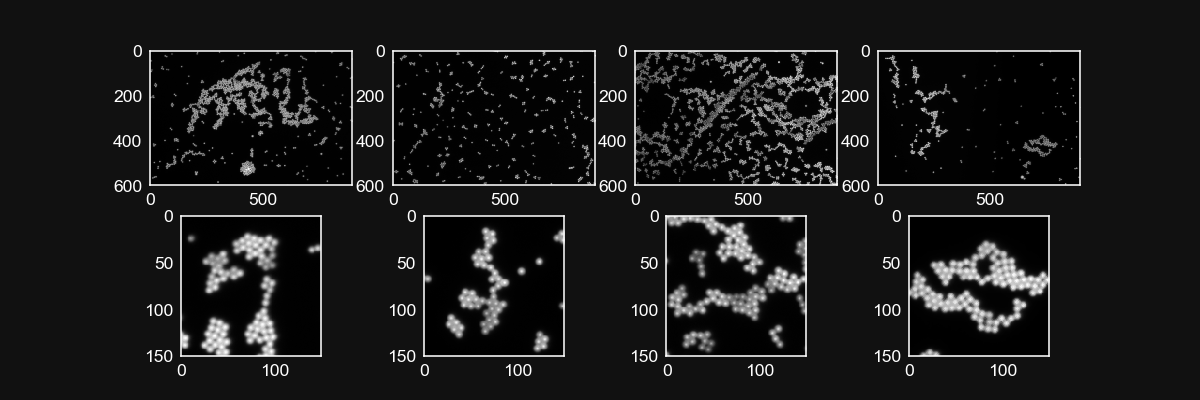

In [113]:
roi_A_strip = 4
roi_A = yp.Roi(start=(259,7600), shape=(600,900))
roi_A_crop = yp.Roi(start=(259+60,7600+520), shape=(150,150))

roi_B_strip = 10
roi_B = yp.Roi(start=(1000,28300), shape=(600,900))
roi_B_crop = yp.Roi(start=(1000+130,28300 + 140), shape=(150, 150))

roi_C_strip = 16
roi_C = yp.Roi(start=(727,9200), shape=(600,900))
roi_C_crop = yp.Roi(start=(727 + 410,9200 + 60), shape=(150,150))

roi_D_strip = 2
roi_D = yp.Roi(start=(400,22900), shape=(600,900))
roi_D_crop = yp.Roi(start=(400+ 350,22900 + 645), shape=(150,150))

plt.figure()
plt.subplot(241)
plt.imshow(beads_archive_list_sns[roi_A_strip]['object_recovered'][roi_A.slice])
plt.subplot(242)
plt.imshow(beads_archive_list_sns[roi_B_strip]['object_recovered'][roi_B.slice])
plt.subplot(243)
plt.imshow(beads_archive_list_sns[roi_C_strip]['object_recovered'][roi_C.slice])
plt.subplot(244)
plt.imshow(beads_archive_list_sns[roi_D_strip]['object_recovered'][roi_D.slice])

plt.subplot(245)
plt.imshow(beads_archive_list_sns[roi_A_strip]['object_recovered'][roi_A_crop.slice])
plt.subplot(246)
plt.imshow(beads_archive_list_sns[roi_B_strip]['object_recovered'][roi_B_crop.slice])
plt.subplot(247)
plt.imshow(beads_archive_list_sns[roi_C_strip]['object_recovered'][roi_C_crop.slice])
plt.subplot(248)
plt.imshow(beads_archive_list_sns[roi_D_strip]['object_recovered'][roi_D_crop.slice])

# Align Coordinates of Coded, Strobed, and SNS

<IPython.core.display.Javascript object>


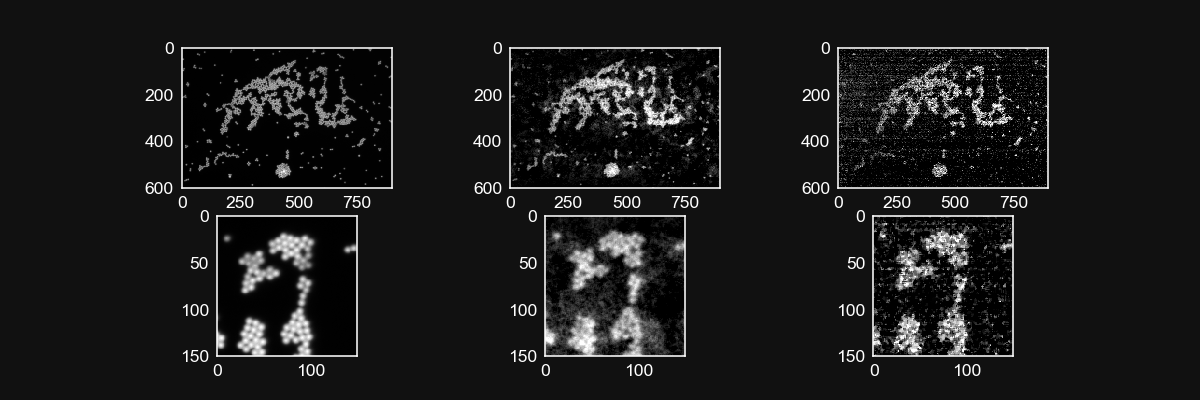

In [116]:
corrections_coded = lambda x: yp.circshift(x, (0, -1237))
corrections_strobed = lambda x: yp.circshift(x, (0, 1280))

plt.figure()
plt.subplot(231)
plt.imshow(beads_archive_list_sns[roi_A_strip]['object_recovered'][roi_A.slice])
plt.subplot(232)
plt.imshow(corrections_coded(beads_archive_list_coded[roi_A_strip]['object_recovered'])[roi_A.slice])
plt.clim((400, 2300))
plt.subplot(233)
plt.imshow(corrections_strobed(beads_archive_list_strobed[roi_A_strip]['object_recovered'])[roi_A.slice])
plt.clim((370, 390))

plt.subplot(234)
plt.imshow(beads_archive_list_sns[roi_A_strip]['object_recovered'][roi_A_crop.slice])
plt.subplot(235)
plt.imshow(corrections_coded(beads_archive_list_coded[roi_A_strip]['object_recovered'])[roi_A_crop.slice])
plt.clim((400, 2300))
plt.subplot(236)
plt.imshow(corrections_strobed(beads_archive_list_strobed[roi_A_strip]['object_recovered'])[roi_A_crop.slice])
plt.clim((370, 390))

<IPython.core.display.Javascript object>


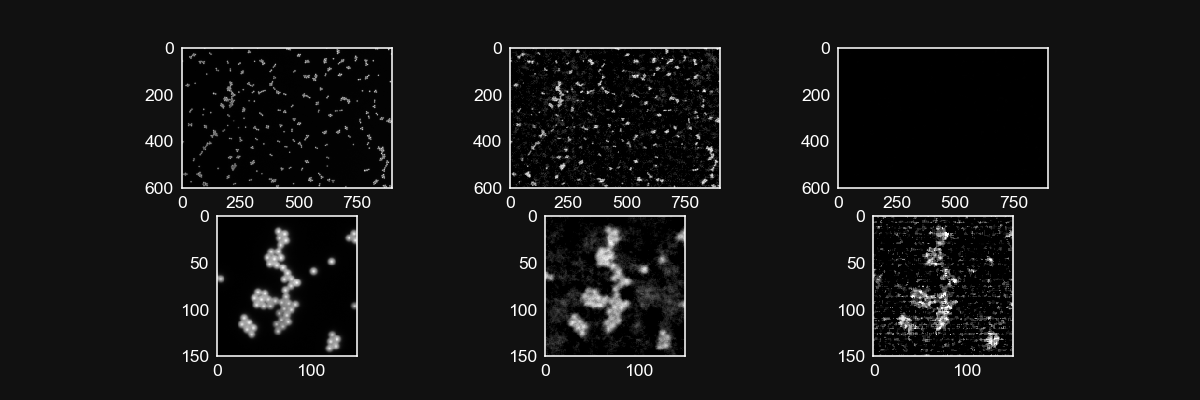

In [115]:
corrections_coded = lambda x: yp.circshift(x, (0, -1237))
corrections_strobed = lambda x: yp.circshift(x, (0, 1280))

plt.figure()
plt.subplot(231)
plt.imshow(beads_archive_list_sns[roi_B_strip]['object_recovered'][roi_B.slice])
plt.subplot(232)
plt.imshow(corrections_coded(beads_archive_list_coded[roi_B_strip]['object_recovered'])[roi_B.slice])
plt.clim((400, 2000))
plt.subplot(233)
plt.imshow(corrections_strobed(beads_archive_list_strobed[roi_B_strip]['object_recovered'])[roi_B.slice])
plt.clim((370, 390))

plt.subplot(234)
plt.imshow(beads_archive_list_sns[roi_B_strip]['object_recovered'][roi_B_crop.slice])
plt.subplot(235)
plt.imshow(corrections_coded(beads_archive_list_coded[roi_B_strip]['object_recovered'])[roi_B_crop.slice])
plt.clim((400, 2000))
plt.subplot(236)
plt.imshow(corrections_strobed(beads_archive_list_strobed[roi_B_strip]['object_recovered'])[roi_B_crop.slice])
plt.clim((370, 390))

<IPython.core.display.Javascript object>


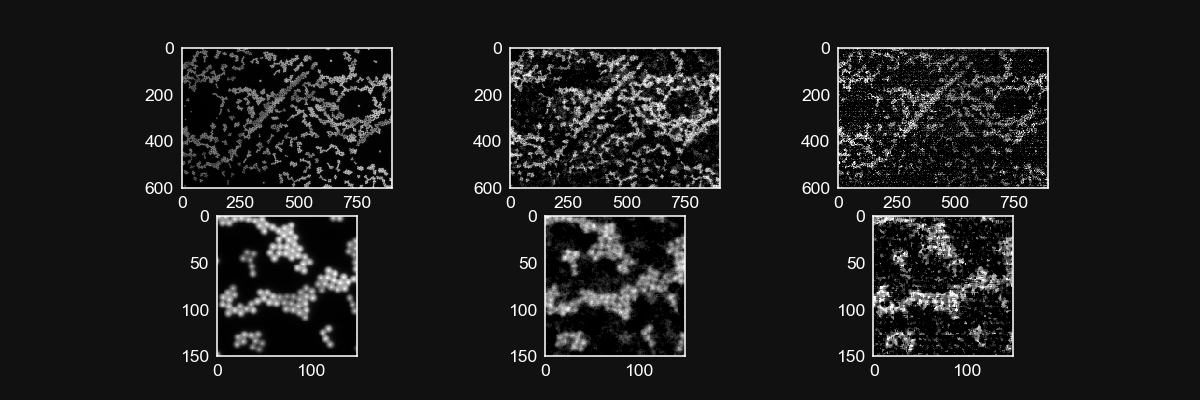

In [117]:
corrections_coded = lambda x: yp.circshift(x, (0, -1237))
corrections_strobed = lambda x: yp.circshift(x, (0, 1280))

plt.figure()
plt.subplot(231)
plt.imshow(beads_archive_list_sns[roi_C_strip]['object_recovered'][roi_C.slice])
plt.subplot(232)
plt.imshow(corrections_coded(beads_archive_list_coded[roi_C_strip]['object_recovered'])[roi_C.slice])
plt.clim((400, 1900))
plt.subplot(233)
plt.imshow(corrections_strobed(beads_archive_list_strobed[roi_C_strip]['object_recovered'])[roi_C.slice])
plt.clim((370, 390))

plt.subplot(234)
plt.imshow(beads_archive_list_sns[roi_C_strip]['object_recovered'][roi_C_crop.slice])
plt.subplot(235)
plt.imshow(corrections_coded(beads_archive_list_coded[roi_C_strip]['object_recovered'])[roi_C_crop.slice])
plt.clim((400, 1900))
plt.subplot(236)
plt.imshow(corrections_strobed(beads_archive_list_strobed[roi_C_strip]['object_recovered'])[roi_C_crop.slice])
plt.clim((370, 390))

<IPython.core.display.Javascript object>


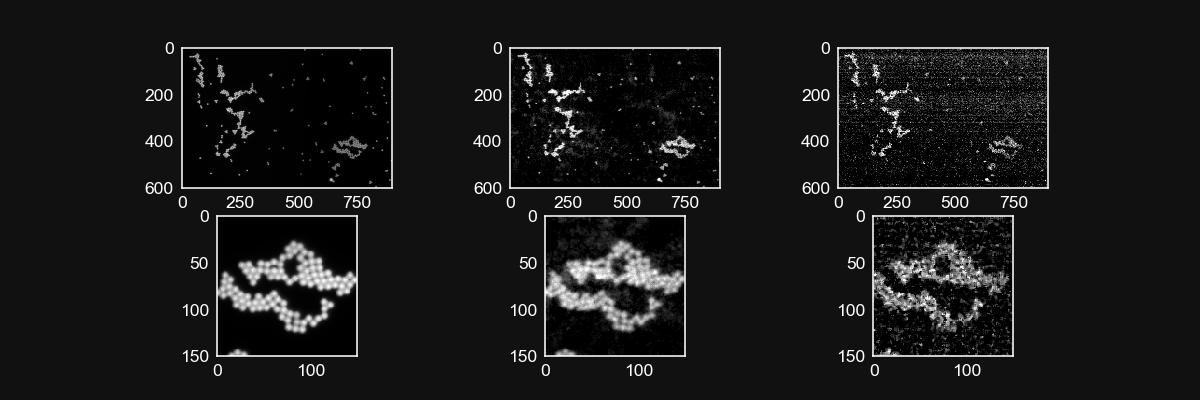

In [99]:
corrections_coded = lambda x: yp.circshift(x, (0, -1237))
corrections_strobed = lambda x: yp.circshift(x, (0, 1280))

plt.figure()
plt.subplot(231)
plt.imshow(beads_archive_list_sns[roi_D_strip]['object_recovered'][roi_D.slice])
plt.subplot(232)
plt.imshow(corrections_coded(beads_archive_list_coded[roi_D_strip]['object_recovered'])[roi_D.slice])
plt.clim((400, 2100))
plt.subplot(233)
plt.imshow(corrections_strobed(beads_archive_list_strobed[roi_D_strip]['object_recovered'])[roi_D.slice])
plt.clim((370, 390))

plt.subplot(234)
plt.imshow(beads_archive_list_sns[roi_D_strip]['object_recovered'][roi_D_crop.slice])
plt.subplot(235)
plt.imshow(corrections_coded(beads_archive_list_coded[roi_D_strip]['object_recovered'])[roi_D_crop.slice])
plt.clim((400, 2100))
plt.subplot(236)
plt.imshow(corrections_strobed(beads_archive_list_strobed[roi_D_strip]['object_recovered'])[roi_D_crop.slice])
plt.clim((370, 390))

## Generate Figures to Save

<IPython.core.display.Javascript object>


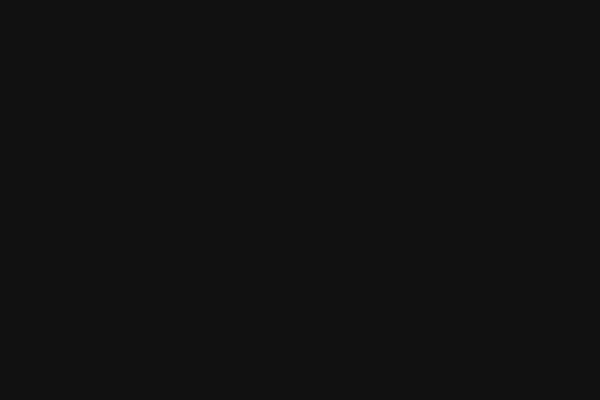

In [118]:
f = plt.figure(figsize=(6,4))

## ROI A: Coded Full
plt.imshow(corrections_coded(beads_archive_list_coded[roi_A_strip]['object_recovered'])[roi_A.slice])
plt.clim((400, 2300))
plt.axis('off')
plt.tight_layout()
plt.savefig(figure_output_directory + 'beads_roi_A_coded_full.pdf', transparent=True)
f.clear()

## ROI A: Stop and Stare
plt.imshow(beads_archive_list_sns[roi_A_strip]['object_recovered'][roi_A_crop.slice])
plt.axis('off')
plt.tight_layout()
plt.savefig(figure_output_directory + 'beads_roi_A_sns.pdf', transparent=True)
f.clear()

## ROI A: Coded
plt.imshow(corrections_coded(beads_archive_list_coded[roi_A_strip]['object_recovered'])[roi_A_crop.slice])
plt.clim((400, 2300))
plt.axis('off')
plt.tight_layout()
plt.savefig(figure_output_directory + 'beads_roi_A_coded.pdf', transparent=True)
f.clear()

## ROI A: Strobed
plt.imshow(corrections_strobed(beads_archive_list_strobed[roi_A_strip]['object_recovered'])[roi_A_crop.slice])
plt.clim((370, 390))
plt.axis('off')
plt.tight_layout()
plt.savefig(figure_output_directory + 'beads_roi_A_strobe.pdf', transparent=True)
f.clear()

## ROI B: Coded Full
plt.imshow(corrections_coded(beads_archive_list_coded[roi_B_strip]['object_recovered'])[roi_B.slice])
plt.clim((400, 2000))
plt.axis('off')
plt.tight_layout()
plt.savefig(figure_output_directory + 'beads_roi_B_coded_full.pdf', transparent=True)
f.clear()

## ROI B: Stop and Stare
plt.imshow(beads_archive_list_sns[roi_B_strip]['object_recovered'][roi_B_crop.slice])
plt.axis('off')
plt.tight_layout()
plt.savefig(figure_output_directory + 'beads_roi_B_sns.pdf', transparent=True)
f.clear()

## ROI B: Coded
plt.imshow(corrections_coded(beads_archive_list_coded[roi_B_strip]['object_recovered'])[roi_B_crop.slice])
plt.clim((400, 2000))
plt.axis('off')
plt.tight_layout()
plt.savefig(figure_output_directory + 'beads_roi_B_coded.pdf', transparent=True)
f.clear()

## ROI B: Strobed
plt.imshow(corrections_strobed(beads_archive_list_strobed[roi_B_strip]['object_recovered'])[roi_B_crop.slice])
plt.clim((370, 390))
plt.axis('off')
plt.tight_layout()
plt.savefig(figure_output_directory + 'beads_roi_B_strobe.pdf', transparent=True)
f.clear()

## ROI C: Coded Full
plt.imshow(corrections_coded(beads_archive_list_coded[roi_C_strip]['object_recovered'])[roi_C.slice])
plt.clim((400, 1900))
plt.axis('off')
plt.tight_layout()
plt.savefig(figure_output_directory + 'beads_roi_C_coded_full.pdf', transparent=True)
f.clear()

## ROI C: Stop and Stare
plt.imshow(beads_archive_list_sns[roi_C_strip]['object_recovered'][roi_C_crop.slice])
plt.axis('off')
plt.tight_layout()
plt.savefig(figure_output_directory + 'beads_roi_C_sns.pdf', transparent=True)
f.clear()

## ROI C: Coded
plt.imshow(corrections_coded(beads_archive_list_coded[roi_C_strip]['object_recovered'])[roi_C_crop.slice])
plt.clim((400, 1900))
plt.axis('off')
plt.tight_layout()
plt.savefig(figure_output_directory + 'beads_roi_C_coded.pdf', transparent=True)
f.clear()

## ROI C: Strobed
plt.imshow(corrections_strobed(beads_archive_list_strobed[roi_C_strip]['object_recovered'])[roi_C_crop.slice])
plt.clim((370, 390))
plt.axis('off')
plt.tight_layout()
plt.savefig(figure_output_directory + 'beads_roi_C_strobed.pdf', transparent=True)
f.clear()

## ROI D: Coded Full
plt.imshow(corrections_coded(beads_archive_list_coded[roi_D_strip]['object_recovered'])[roi_D.slice])
plt.clim((400, 2100))
plt.axis('off')
plt.tight_layout()
plt.savefig(figure_output_directory + 'beads_roi_D_coded_full.pdf', transparent=True)
f.clear()

## ROI D: Stop and Stare
plt.imshow(beads_archive_list_sns[roi_D_strip]['object_recovered'][roi_D_crop.slice])
plt.axis('off')
plt.tight_layout()
plt.savefig(figure_output_directory + 'beads_roi_D_sns.pdf', transparent=True)
f.clear()

## ROI D: Coded
plt.imshow(corrections_coded(beads_archive_list_coded[roi_D_strip]['object_recovered'])[roi_D_crop.slice])
plt.clim((400, 2100))
plt.axis('off')
plt.tight_layout()
plt.savefig(figure_output_directory + 'beads_roi_D_coded.pdf', transparent=True)
f.clear()

## ROI D: Strobed
plt.imshow(corrections_strobed(beads_archive_list_strobed[roi_D_strip]['object_recovered'])[roi_D_crop.slice])
plt.clim((370, 390))
plt.axis('off')
plt.tight_layout()
plt.savefig(figure_output_directory + 'beads_roi_D_strobed.pdf', transparent=True)
f.clear()

## Re-Stich strips

In [3]:
strip_directory = os.path.expanduser('~/datasets/motiondeblur/beads_stitched/')

# Get list of beads paths and sort by strip index
beads_archive_file_list = glob.glob(strip_directory + 'beads2_raster_45ms_coded*.npz')
strip_indicies = [int(archive.split('strip_')[1].split('_regularize=')[0]) for archive in beads_archive_file_list]
sort_indicies = np.argsort(strip_indicies)
beads_archive_list_coded = [np.load(beads_archive_file_list[index]) for index in sort_indicies]
print(len(beads_archive_list_coded))

18


In [120]:
23.4 / 4.7 * 0.5

2.4893617021276593

### Load and center ROIs

In [29]:
roi_list_strips = [yp.Roi(**archive['roi'].item()) for archive in beads_archive_list_coded]
roi_full = yp.sum(roi_list_strips)

roi_list_strips = [roi - roi_full.start for roi in roi_list_strips]
roi_full -= roi_full.start

### Create Segmentation Operator for Decimated ROIs

In [35]:
# Load measurements (This will take a while)
measurement_list = [yp.cast(archive['object_recovered']) for archive in beads_archive_list_coded]

In [37]:
# Decimate measurements (This will also take a while)
measurement_list_decimated = [yp.filter.decimate(measurement, decimation_factor) for measurement in measurement_list]

In [51]:
roi_list_decimated = [roi.decimate(decimation_factor) for roi in roi_list_strips]
roi_list_decimated_full = sum(roi_list_decimated)
for roi in roi_list_decimated:
    roi.input_shape = roi_list_decimated_full.shape

In [58]:
G = ops.Segmentation(roi_list_decimated)
y_stitched = G.inv * ops.VecStack(measurement_list_decimated)

np.savez(figure_output_directory + 'stitched.npz', stitched=y_stitched)

<IPython.core.display.Javascript object>


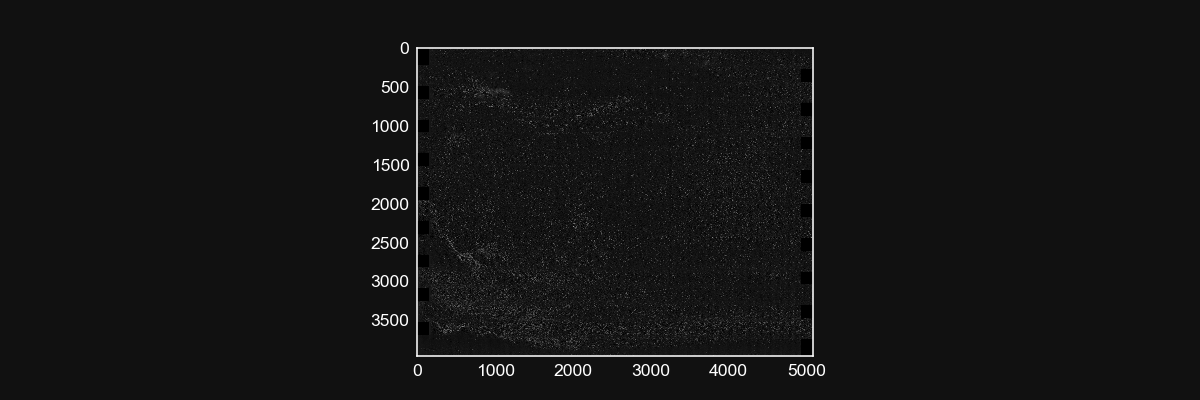

In [57]:
plt.figure()
plt.imshow(yp.abs(y_stitched))

## Crop ROI and Save for Figure

In [ ]:
y_stitched = np.load(figure_output_directory + 'stitched.npz')['stitched']

<IPython.core.display.Javascript object>


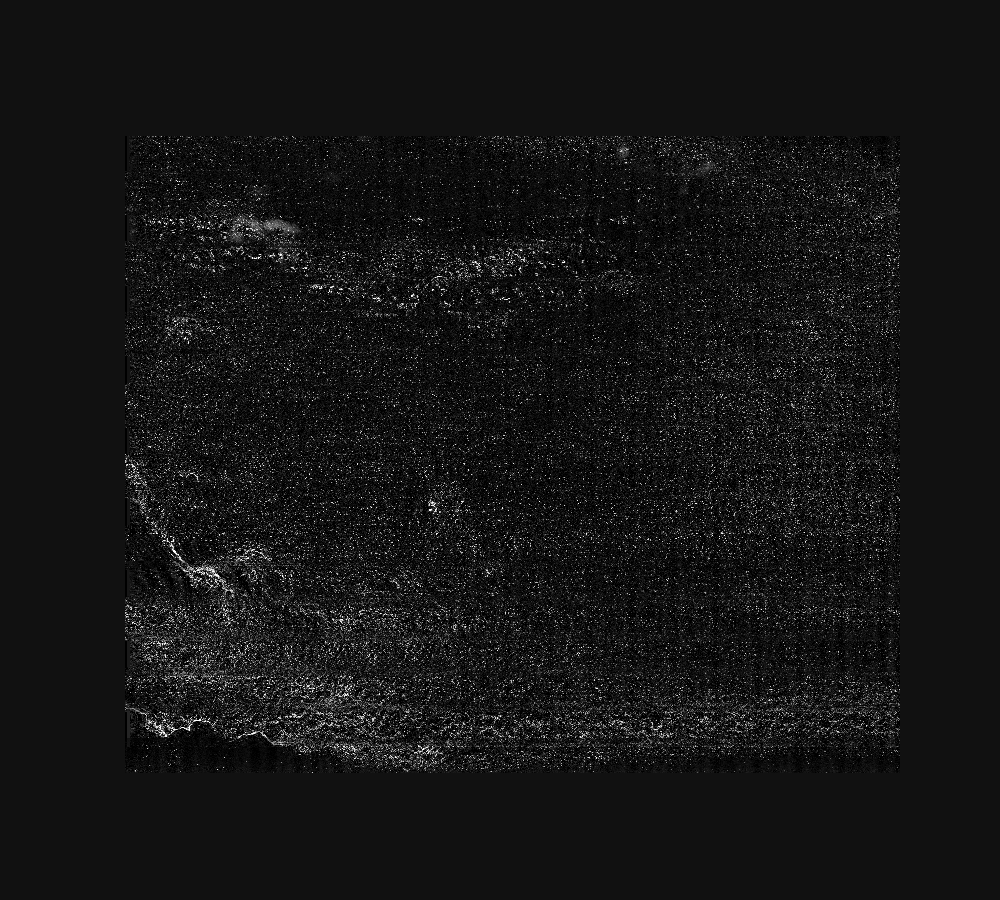

In [64]:
center_roi = yp.Roi(start=(0,145), end=(3900, 4887))

plt.figure(figsize=(10,9))
plt.imshow(yp.abs(y_stitched[center_roi.slice]))
plt.clim(300, 2000)
plt.axis('off')
plt.savefig(figure_output_directory + 'stitched.pdf', transparent=True)

## Load Full-Frame

In [123]:
filename = '/Users/zfphil/datasets/motiondeblur/beads_stitched/stitched_recon_codedbeadschannel=0-2.tiff'
img = tifffile.imread(filename)

In [124]:
img.shape

(31677, 39085)

## Bin Image

In [126]:
4680 * 8 * 3951 * 8 / 1e6

1183.40352

In [201]:
img_binned = yp.filter.bin(img, 8)

## Crop Center Region

In [210]:
center_roi = yp.Roi(start=(0,200), end=(3951, 4680))

<IPython.core.display.Javascript object>


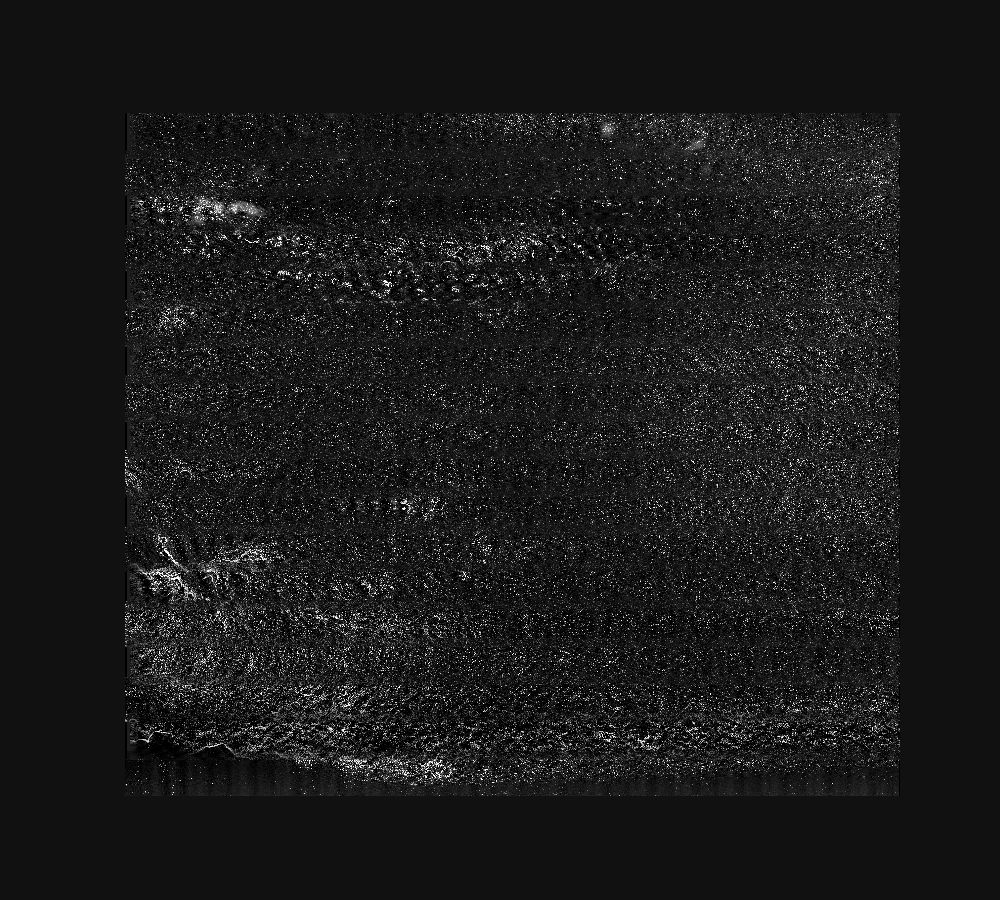

In [214]:
plt.figure(figsize=(10,9))
plt.imshow(img_binned[center_roi.slice])
plt.clim(70, 120)
plt.axis('off')
plt.savefig(figure_output_directory + 'stitched.pdf', transparent=True)

In [26]:
## Perform flat-field normalization on individual strips
strip_directory = os.path.expanduser('~/datasets/motiondeblur/beads_stitched/')

# Get list of beads paths and sort by strip index
beads_archive_file_list = glob.glob(strip_directory + 'beads2_raster_45ms_coded*.npz')
strip_indicies = [int(archive.split('strip=')[1].split('_channel=')[0]) for archive in beads_archive_file_list]
sort_indicies = np.argsort(strip_indicies)
beads_archive_list_coded = [np.load(beads_archive_file_list[index]) for index in sort_indicies]
print(len(beads_archive_list_coded))

# Load Full-Field Coded Image

In [ ]:
filename = '/Users/zfphil/datasets/motiondeblur/beads_stitched/stitched_recon_codedbeadschannel=0-2.tiff'
img = tifffile.imread(filename)

# Define Three Major ROIs

In [ ]:
plt.figure()
plt.imshow(bin(img,64))

In [ ]:
plt.figure(figsize=(12,12))
plt.imshow(img_crop, interpolation=None)

In [ ]:
img_small = yp.filter.decimate(img, 32)

In [ ]:
plt.figure()
plt.imshow(img_small)

In [ ]:
roi_A = (yp.Roi(start=(5650,7050), shape=(600,900)))
roi_B = (yp.Roi(start=(23231,9776), shape=(600,900)))
roi_C = (yp.Roi(start=(11111,30000), shape=(600,900)))

plt.figure(figsize=(7,10))
plt.subplot(311)
plt.imshow(img[roi_A.slice])
plt.subplot(313)
plt.imshow(img[roi_B.slice])
plt.subplot(312)
plt.imshow(img[roi_C.slice])